In [49]:
import matplotlib.pyplot as plt
import os
import igor
import numpy as np
# from igor import *
import sys
# from igg import igorpy
from igg import binarywave
%matplotlib inline



fname = 'p90024.ibw'
# dumpibw(fname)
# dir(igor)
# igorpy.load(fname)
data = binarywave.load(fname)['wave']
print(data.keys())

dict_keys(['bin_header', 'wave_header', 'wData', 'formula', 'note', 'data_units', 'dimension_units', 'labels', 'sIndices'])


In [57]:
for key in data.keys():
    if not key == 'wData':
        print(key, data[key], '\n\n\n\n')

bin_header {'checksum': -12984, 'wfmSize': 9437504, 'formulaSize': 0, 'noteSize': 34222, 'dataEUnitsSize': 0, 'dimEUnitsSize': array([0, 0, 0, 0]), 'dimLabelsSize': array([  0,   0, 320,   0]), 'sIndicesSize': 0, 'optionsSize1': 0, 'optionsSize2': 0} 




wave_header {'next': 278706480, 'creationDate': 3373459566, 'modDate': 3619428843, 'npnts': 2359296, 'type': 2, 'dLock': 0, 'whpad1': array([b'', b'', b'', b'', b'', b''], dtype='|S1'), 'whVersion': 1, 'bname': b'p90024', 'whpad2': 0, 'dFolder': 96603496, 'nDim': array([512, 512,   9,   0]), 'sfA': array([4.30528376e-09, 4.30528376e-09, 1.00000000e+00, 1.00000000e+00]), 'sfB': array([0., 0., 0., 0.]), 'dataUnits': array([b'm', b'', b'', b''], dtype='|S1'), 'dimUnits': array([[b'm', b'', b'', b''],
       [b'm', b'', b'', b''],
       [b'', b'', b'', b''],
       [b'', b'', b'', b'']], dtype='|S1'), 'fsValid': 0, 'whpad3': 0, 'topFullScale': 0.0, 'botFullScale': 0.0, 'dataEUnits': 0, 'dimEUnits': array([0, 0, 0, 0]), 'dimLabels': array

[b'HeightTrace', b'HeightRetrace', b'AmplitudeTrace', b'AmplitudeRetrace', b'PhaseTrace', b'PhaseRetrace', b'ZSensorTrace', b'ZSensorRetrace', b'HeightTraceMod0']
(512, 512, 9)


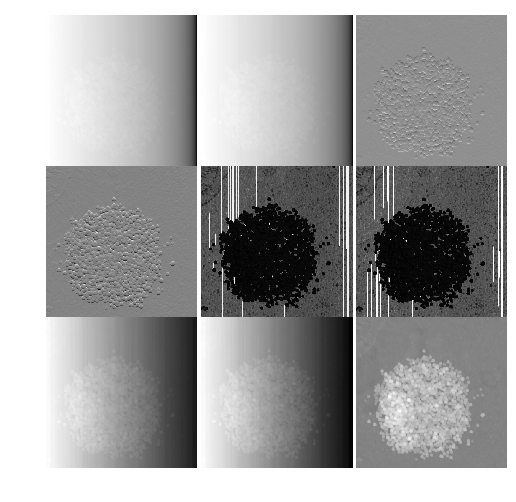

In [50]:
print(data['labels'][2][1:])
im = data['wData']
print(im.shape)
plt.figure(figsize=(6, 6), dpi=100)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(im[:, :, i], cmap='gray')
    plt.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

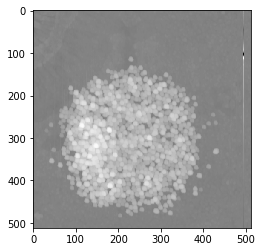

In [52]:
plt.imshow(im[:, :, -1], cmap='gray')
plt.show()

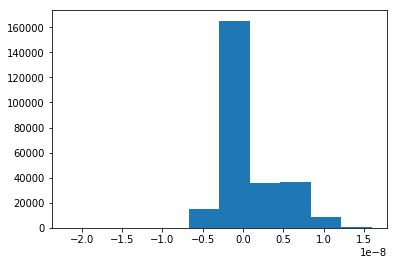

-2.1829223e-08 1.5951212e-08


In [60]:
plt.hist(im[:, :, -1].flatten())
plt.show()

print(np.min(im[...,-1]), np.max(im[...,-1]))

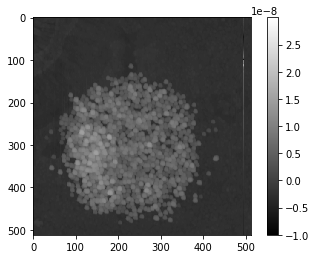

In [71]:
import copy #copy import deepcopy
x = copy.deepcopy(im[..., -1])
x[x < -10e-9] = 10e-9
x[x > 30e-9] = 30e-9
plt.imshow(x, cmap='gray')
plt.clim(-10e-9, 30e-9)
plt.colorbar()